In [1]:
import pandas as pd
import json
import os
import statsmodels.api as sm

In [2]:
os.chdir('/Users/HELoz/Downloads')

In [3]:
# Reading the json as a dict
with open('en_sentiment.json') as json_data:
    data = json.load(json_data)

In [4]:
# using the from_dict load function. Note that the 'orient' parameter 
#is not using the default value (or it will give the same error that you got before)
# We transpose the resulting df and set index column as its index to get this result
df = pd.DataFrame.from_dict(data, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,...,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982
After_It_Happened,"{'time': '2009-09-15T23:09:51Z', 'sentiment': ...","{'time': '2009-09-15T23:30:37Z', 'sentiment': ...","{'time': '2009-09-16T00:25:47Z', 'sentiment': ...","{'time': '2009-09-16T00:33:06Z', 'sentiment': ...","{'time': '2009-09-16T00:38:05Z', 'sentiment': ...","{'time': '2009-09-16T08:29:30Z', 'sentiment': ...","{'time': '2009-09-16T22:08:12Z', 'sentiment': ...","{'time': '2009-09-18T20:20:34Z', 'sentiment': ...","{'time': '2009-09-18T20:27:23Z', 'sentiment': ...","{'time': '2009-09-18T21:31:45Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Alan_Freeman,"{'time': '2004-09-19T10:01:14Z', 'sentiment': ...","{'time': '2004-09-20T12:35:12Z', 'sentiment': ...","{'time': '2004-10-30T14:40:03Z', 'sentiment': ...","{'time': '2004-12-15T12:31:30Z', 'sentiment': ...","{'time': '2004-12-27T11:18:42Z', 'sentiment': ...","{'time': '2005-01-28T02:34:36Z', 'sentiment': ...","{'time': '2005-01-28T02:55:41Z', 'sentiment': ...","{'time': '2005-02-20T05:06:39Z', 'sentiment': ...","{'time': '2005-05-17T00:29:54Z', 'sentiment': ...","{'time': '2005-05-17T08:34:50Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Alex_White_(author),"{'time': '2018-11-25T17:07:48Z', 'sentiment': ...","{'time': '2018-11-25T17:13:47Z', 'sentiment': ...","{'time': '2018-11-25T17:14:05Z', 'sentiment': ...","{'time': '2018-11-25T22:14:39Z', 'sentiment': ...","{'time': '2018-11-25T22:14:54Z', 'sentiment': ...","{'time': '2018-11-25T22:17:54Z', 'sentiment': ...","{'time': '2018-11-25T22:23:25Z', 'sentiment': ...","{'time': '2018-11-25T22:23:39Z', 'sentiment': ...","{'time': '2018-11-25T23:27:55Z', 'sentiment': ...","{'time': '2018-11-25T23:29:21Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Alison_DiLaurentis,"{'time': '2010-08-18T00:38:53Z', 'sentiment': ...","{'time': '2010-08-27T02:09:04Z', 'sentiment': ...","{'time': '2013-03-21T22:00:25Z', 'sentiment': ...","{'time': '2013-03-21T22:09:50Z', 'sentiment': ...","{'time': '2013-03-21T22:10:05Z', 'sentiment': ...","{'time': '2013-03-21T22:20:32Z', 'sentiment': ...","{'time': '2013-03-21T22:20:53Z', 'sentiment': ...","{'time': '2013-03-21T22:25:33Z', 'sentiment': ...","{'time': '2013-03-21T22:36:33Z', 'sentiment': ...","{'time': '2013-03-21T22:40:38Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Alison_Mau,"{'time': '2008-09-15T15:15:49Z', 'sentiment': ...","{'time': '2008-09-15T15:33:37Z', 'sentiment': ...","{'time': '2008-09-15T15:49:44Z', 'sentiment': ...","{'time': '2009-01-24T07:24:41Z', 'sentiment': ...","{'time': '2009-01-24T07:25:23Z', 'sentiment': ...","{'time': '2009-06-22T07:51:58Z', 'sentiment': ...","{'time': '2009-06-22T09:39:11Z', 'sentiment': ...","{'time': '2009-06-22T09:45:42Z', 'sentiment': ...","{'time': '2009-06-22T09:46:21Z', 'sentiment': ...","{'time': '2009-06-22T11:44:28Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vikas_Gupta,"{'time': '2017-11-03T04:50:47Z', 'sentiment': ...","{'time': '2017-11-03T04:53:34Z', 'sentiment': ...","{'time': '2017-11-03T05:01:04Z', 'sentiment': ...","{'time': '2017-11-03T05:27:58Z', 'sentiment': ...","{'time': '2017-11-03T05:28:16Z', 'sentiment': ...","{'time': '2017-11-03T05:54:31Z', 'sentiment': ...","{'time': '2017-11-03T10:55:25Z', 'sentiment': ...","{'time': '2017-11-03T17:28:22Z', 'sentiment': ...","{'time': '2017-11-07T20:42:30Z', 'sentiment': ...","{'time': '2017-11-07T20:43:23Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Yoko_Yamada,"{'time': '2010-12-28T03:42:35Z', 'sentiment': ...","{'time': '2010-12-28T16:34:00Z', 'sentiment': ...","{'time': '2011-01-09T06:13:34Z', 'sentiment': ...","{'time': '2011-04-15T10:42:48Z', 'sentiment': ...","{'time': '2011-06-15T22:20:43Z', 'sentiment': ...","{'time': '2011-08-04T16:53:

In [11]:
df.iloc[0][0]

{'time': '2009-09-15T23:09:51Z',
 'sentiment': {'neg': 0.031, 'neu': 0.915, 'pos': 0.053, 'compound': 0.7717}}

In [5]:
def to_year(string):
    year = string[0:4]
    return int(year)

In [12]:
def to_dataframe(df, language):
    dflist = []
    for i in range(len(df)):
        mini = df.iloc[i].dropna()
        time = []
        sentiment = []
        for j in range(len(mini)):
            time.append(mini[j]['time'])
            if language == 'English':
                sentiment.append(mini[j]['sentiment']['compound'])
            else:
                sentiment.append(mini[j]['sentiment'])
        dfn = pd.DataFrame({'time': time, 'sentiment': sentiment})
        dfn['time'] = dfn['time'].apply(to_year)
        dfn = (
            dfn.groupby('time')['sentiment']
            .agg(["mean", "median"])
            .reset_index()
            .rename(columns={
                "time": "year", 
                "mean": "avg_sentiment", 
                "median": "med_sentiment"
            })
        )
        dfn['article name'] = mini.name
        dflist.append(dfn)
    new_df = pd.concat(dflist, ignore_index=True)
    return new_df

In [14]:
new_df = to_dataframe(df, 'English')
new_df

,year,avg_sentiment,med_sentiment,article name
0,2009,-0.786387,-0.9924,After_It_Happened
1,2010,-0.998220,-0.9982,After_It_Happened
2,2011,-0.998200,-0.9982,After_It_Happened
3,2012,-0.998200,-0.9982,After_It_Happened
4,2016,-0.998200,-0.9982,After_It_Happened
...,...,...,...,...
1235,2017,0.980600,0.9806,Édith_Thomas
1236,2018,0.980600,0.9806,Édith_Thomas
1237,2019,0.980600,0.9806,Édith_Thomas
1238,2020,0.980600,0.9806,Édith_Thomas


In [15]:
dum = pd.get_dummies(new_df['article name'], drop_first=True)
dum

,Alan_Freeman,Alex_White_(author),Alison_DiLaurentis,Alison_Mau,Alysia_Yeoh,Andrea_Jenkins,Anne_Desclos,Antonio_Gala,Appearances_Are_Deceptive,Archibald_Hall,...,The_Pillow_Book_(film),The_Stolen_Earth,The_Years_of_Rice_and_Salt,Thirteen_(House),Utena_Tenjou,Vikas_Gupta,Yoko_Yamada,Young_&_Wild_(2012_film),Zara_Whites,Édith_Thomas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
new_df = new_df.join(dum).drop('article name', axis=1)
new_df

,year,avg_sentiment,med_sentiment,Alan_Freeman,Alex_White_(author),Alison_DiLaurentis,Alison_Mau,Alysia_Yeoh,Andrea_Jenkins,Anne_Desclos,...,The_Pillow_Book_(film),The_Stolen_Earth,The_Years_of_Rice_and_Salt,Thirteen_(House),Utena_Tenjou,Vikas_Gupta,Yoko_Yamada,Young_&_Wild_(2012_film),Zara_Whites,Édith_Thomas
0,2009,-0.786387,-0.9924,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,-0.998220,-0.9982,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,-0.998200,-0.9982,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,-0.998200,-0.9982,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,-0.998200,-0.9982,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,2017,0.980600,0.9806,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1236,2018,0.980600,0.9806,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1237,2019,0.980600,0.9806,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1238,2020,0.980600,0.9806,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
cols = list(new_df.columns)
cols.remove('avg_sentiment')
cols.remove('med_sentiment')

In [18]:
cols

['year',
 'Alan_Freeman',
 'Alex_White_(author)',
 'Alison_DiLaurentis',
 'Alison_Mau',
 'Alysia_Yeoh',
 'Andrea_Jenkins',
 'Anne_Desclos',
 'Antonio_Gala',
 'Appearances_Are_Deceptive',
 'Archibald_Hall',
 'Aubrey_Plaza',
 'Bob_Schreck',
 'Camryn_Grimes',
 'Cardiff_Rift',
 'Carole_Ita_White',
 'Casey_McQuiston',
 'Catwoman',
 'Celia_Rose_Gooding',
 'Changing_Times_(film)',
 'Chika_(rapper)',
 'Christa_Winsloe',
 'Christian_Marquand',
 'Colette_(2018_film)',
 'David_Allen_Green',
 'David_Farrier',
 'David_Gascoyne',
 'Dominick_Dunne',
 'Don_Dunstan',
 'Doppelgangland',
 'Dylan_Geick',
 'Edge_of_Seventeen_(film)',
 'Edna_St._Vincent_Millay',
 'Elif_Shafak',
 'End_of_Days_(Torchwood)',
 'End_of_the_Road_(Torchwood)',
 'Erin_Zwiener',
 'Etta_Candy',
 'Evan_Rachel_Wood',
 'Faye_Whitaker',
 'Gaby_Dunn',
 'Glesca_Marshall',
 'Gopi_Shankar_Madurai',
 'Greeks_Bearing_Gifts_(Torchwood)',
 'Hannah_Höch',
 'Helen_Magnus',
 'Hugh_Laing',
 'Inga_Beale',
 'Iyari_Limon',
 'Jacob_Frye',
 'Jerrod_Carmi

In [19]:
Y = new_df['avg_sentiment']
X = new_df[cols]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
p = results.params

In [20]:
Y2 = new_df['med_sentiment']
model2 = sm.OLS(Y2,X)
results2 = model2.fit()
p2 = results2.params

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_sentiment   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     34.84
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          9.90e-285
Time:                        23:31:11   Log-Likelihood:                -430.27
No. Observations:                1240   AIC:                             1071.
Df Residuals:                    1135   BIC:                             1608.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [22]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          med_sentiment   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     30.78
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.50e-262
Time:                        23:31:21   Log-Likelihood:                -516.25
No. Observations:                1240   AIC:                             1243.
Df Residuals:                    1135   BIC:                             1780.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

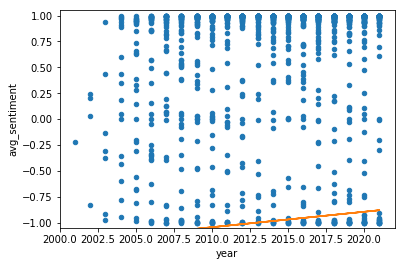

In [25]:
ax = new_df.plot(x='year', y='avg_sentiment', kind='scatter')
ax.plot(X, p.const + p.year * X)
ax.set_xlim([2000, 2022])
ax.set_ylim([-1.05, 1.05])
fig = ax.get_figure()
#fig.savefig('English Results - Mean.png')

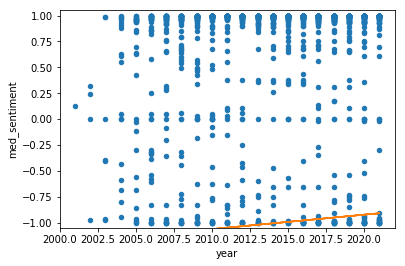

In [24]:
ax2 = new_df.plot(x='year', y='med_sentiment', kind='scatter')
ax2.plot(X, p2.const + p2.year * X)
ax2.set_xlim([2000, 2022])
ax2.set_ylim([-1.05, 1.05])
fig2 = ax2.get_figure()
#fig.savefig('English Results - Median.png')

In [ ]:
#new_df.hist(by="year")